# Problem 1: Random Forest Classifier

## Breast Cancer Data

In [1]:
#load libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns= np.append(cancer['feature_names'], ['target']))

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

* **Number	of	samples**: your	model	should	be	trained	with	different	number	of	
samples by	adding	10%	of	samples	each	time

Accuracy 0.1 training: 0.937
Accuracy 0.1 testing: 0.918

Accuracy 0.2 training: 0.947
Accuracy 0.2 testing: 0.928

Accuracy 0.3 training: 0.955
Accuracy 0.3 testing: 0.934

Accuracy 0.4 training: 0.951
Accuracy 0.4 testing: 0.932

Accuracy 0.5 training: 0.956
Accuracy 0.5 testing: 0.937

Accuracy 0.6 training: 0.957
Accuracy 0.6 testing: 0.936

Accuracy 0.7 training: 0.949
Accuracy 0.7 testing: 0.934

Accuracy 0.8 training: 0.956
Accuracy 0.8 testing: 0.939

Accuracy 0.9 training: 0.956
Accuracy 0.9 testing: 0.937



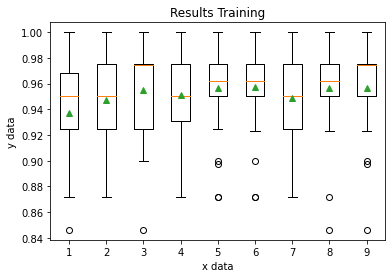

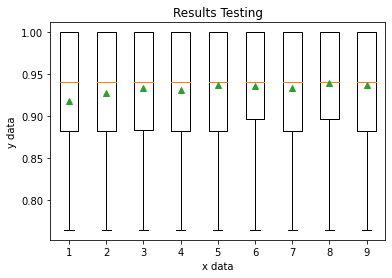

In [ ]:
results_training, results_testing = [], []
for i in np.arange(0.1, 1, 0.1):
  
  #define model
  model = RandomForestClassifier(max_samples=i).fit(X,y)
  
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  # evaluate the model and collect the results
  scores_training = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  scores_test = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
  
  #set up array of results 
  results_training.append(scores_training)
  results_testing.append(scores_test)
  
  print(f'Accuracy {i:.1f} training: {np.mean(scores_training):.03f}')
  print(f'Accuracy {i:.1f} testing: {np.mean(scores_test):.03f}\n')


plt.boxplot(results_training, showmeans=True)
plt.title('Results Training')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

plt.boxplot(results_testing, showmeans=True)
plt.title('Results Testing')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

* **Number	of	features**: your	model	should	be	trained	with	different	number	of features such	as	{1,	2,	3,	4,	5,	6,	7,	8,	9,	10}

Accuracy 1.0 training: 0.956
Accuracy 1.0 testing: 0.938

Accuracy 2.0 training: 0.960
Accuracy 2.0 testing: 0.934

Accuracy 3.0 training: 0.955
Accuracy 3.0 testing: 0.928

Accuracy 4.0 training: 0.958
Accuracy 4.0 testing: 0.939

Accuracy 5.0 training: 0.957
Accuracy 5.0 testing: 0.939

Accuracy 6.0 training: 0.957
Accuracy 6.0 testing: 0.939

Accuracy 7.0 training: 0.956
Accuracy 7.0 testing: 0.945

Accuracy 8.0 training: 0.952
Accuracy 8.0 testing: 0.932

Accuracy 9.0 training: 0.957
Accuracy 9.0 testing: 0.937

Accuracy 10.0 training: 0.954
Accuracy 10.0 testing: 0.936



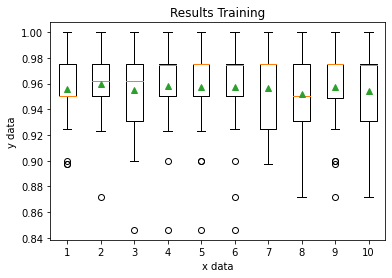

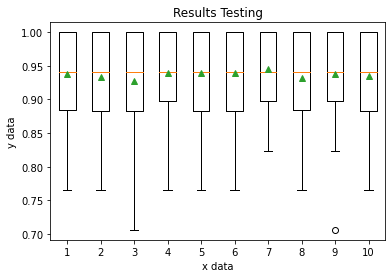

In [ ]:
results_testing, results_training = [], []

for i in np.arange(1,11):
  #define model
  model = RandomForestClassifier(max_features=i).fit(X,y)
  
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  # evaluate the model and collect the results
  scores_training = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  scores_test = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
  
  #set up array of results 
  results_training.append(scores_training)
  results_testing.append(scores_test)
  
  print(f'Accuracy {i:.1f} training: {np.mean(scores_training):.03f}')
  print(f'Accuracy {i:.1f} testing: {np.mean(scores_test):.03f}\n')

plt.boxplot(results_training, showmeans=True)
plt.title('Results Training')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

plt.boxplot(results_testing, showmeans=True)
plt.title('Results Testing')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

* **Number	of	trees**:	your	model	should	be	trained	with	different	number	of	trees	such	as	{10, 100,	500,	1,000}

Accuracy 10.0 training: 0.945
Accuracy 10.0 testing: 0.928

Accuracy 100.0 training: 0.953
Accuracy 100.0 testing: 0.930

Accuracy 500.0 training: 0.960
Accuracy 500.0 testing: 0.939

Accuracy 1000.0 training: 0.958
Accuracy 1000.0 testing: 0.937



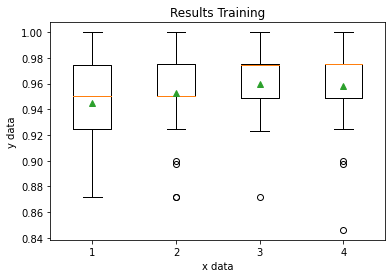

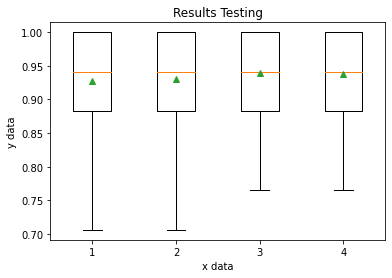

In [ ]:
vals = [10,100,500,1000]
results_testing, results_training = [], []

for k in vals:
  #define model
  model = RandomForestClassifier(n_estimators=k).fit(X,y)
  
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  # evaluate the model and collect the results
  scores_training = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  scores_test = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
  
  #set up array of results 
  results_training.append(scores_training)
  results_testing.append(scores_test)
  
  print(f'Accuracy {k:.1f} training: {np.mean(scores_training):.03f}')
  print(f'Accuracy {k:.1f} testing: {np.mean(scores_test):.03f}\n')

plt.boxplot(results_training, showmeans=True)
plt.title('Results Training')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

plt.boxplot(results_testing, showmeans=True)
plt.title('Results Testing')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

# Problem 2: KNN

## Car Data

Attribute Information via UCI database:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

column_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
                'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/MAT5001/main/Project_3/M10_Data.csv', names = column_names)

#check the dimensions of the data and display the data
print('The dimensions of the data are: ', df.shape)
df.head()

The dimensions of the data are:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
print(f"There are currently %s question marks." %df[df == '?'].count().sum())
#replace '?' with NaN
df.replace('?', np.NaN, inplace=True)
print(f"There are currently %s question marks." %df[df == '?'].count().sum())

There are currently 59 question marks.
There are currently 0 question marks.


In [ ]:
#we set aside the continuous data to turn it into numeric data (since, as shown above, not all of it is in numeric format)
for_boxes = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
                'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# convert for_boxes to numeric and check that it is so
df[for_boxes] = df[for_boxes].apply(pd.to_numeric)
df[for_boxes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


In [ ]:
#check if we have any empty data
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
#remove normalized losses and impute with mode for every other column
holder = df['normalized-losses']
df.drop('normalized-losses', axis=1, inplace=True)
df = df.fillna(df.mode().iloc[0])

In [ ]:
#do label encoding on all categorical data

df['normalized-losses'] = holder
#create a subset to work with
df_set = df[['make','fuel-type','aspiration','num-of-doors',	'body-style',	'drive-wheels',	'engine-location','engine-type','num-of-cylinders','fuel-system']]

#convert to numbers using LabelEncoder
df_set = df_set.apply(LabelEncoder().fit_transform)

In [ ]:
#replace values and use an imputer for the normalized-losses column
df.drop(df[['make','fuel-type','aspiration','num-of-doors',	'body-style',	'drive-wheels',	'engine-location','engine-type','num-of-cylinders','fuel-system']],axis=1,inplace=True)

In [ ]:
#rejoin all data into one frame
result = pd.concat([df, df_set], axis=1, join='inner')

In [ ]:
#impute with n = 3 for normalized-losses
#I use this strange implementation so that it will stay in a data frame
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(result),columns = result.columns)

In [ ]:
df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,127.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,144.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,144.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,164.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,164.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0


In [ ]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [ ]:
#query	=	[1,	100,	bmw, gas,	std,	four,	sedan,	fwd,	front,	100.0,	170.0,	65.0,	50.0,	2000,	rotor,	four,	200, mfi,	3.0,	3.0,	15,	200,	5000,	23,	27,	30000]
query	=	[1,	100,	2, 1,	0,	0,	3,	1,	0,	100.0,	170.0,	65.0,	50.0,	2000,	6,	2,	200, 4,	3.0,	3.0,	15,	200,	5000,	23,	27,	30000]
alt_df = df.to_numpy()
a,b = knn(alt_df,query,k = 5,distance_fn=euclidean_distance, choice_fn=mode)

outputs = []
for _, index in a:
  outputs.append(alt_df[index])

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Print recommended movie titles
for k in outputs:
  print(k)

[   2.     93.7   156.9    63.4    53.7  2050.     97.      3.62    2.36
    9.     69.   4900.     31.     36.   5118.     83.     18.      1.
    0.      1.      2.      1.      0.      4.      2.      1.  ]
[   2.     88.4   141.1    60.3    53.2  1488.     61.      2.91    3.03
    9.5    48.   5100.     47.     53.   5151.    121.      3.      1.
    0.      1.      2.      1.      0.      2.      4.      1.  ]
[   1.     93.1   159.1    64.2    54.1  1890.     91.      3.03    3.15
    9.     68.   5000.     30.     31.   5195.    104.      8.      1.
    0.      1.      2.      1.      0.      3.      2.      1.  ]
[   1.     95.7   158.7    63.6    54.5  1985.     92.      3.05    3.03
    9.     62.   4800.     35.     39.   5348.     87.     19.      1.
    0.      1.      2.      1.      0.      3.      2.      1.  ]
[   1.     94.5   165.3    63.8    54.5  1889.     97.      3.15    3.29
    9.4    69.   5200.     31.     37.   5499.    128.     12.      1.
    0.      1.  

In [ ]:
#query	=	[1,	100,	bmw, gas,	std,	four,	sedan,	fwd,	front,	100.0,	170.0,	65.0,	50.0,	2000,	rotor,	four,	200, mfi,	3.0,	3.0,	15,	200,	5000,	23,	27,	30000]
query	=	[1,	100,	2, 1,	0,	0,	3,	1,	0,	100.0,	170.0,	65.0,	50.0,	2000,	6,	2,	200, 4,	3.0,	3.0,	15,	200,	5000,	23,	27,	30000]
alt_df = df.to_numpy()
a,b = knn(alt_df,query,k = 10,distance_fn=euclidean_distance, choice_fn=mode)

outputs = []
for _, index in a:
  outputs.append(alt_df[index])

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Print recommended movie titles
for k in outputs:
  print(k)

[   2.     93.7   156.9    63.4    53.7  2050.     97.      3.62    2.36
    9.     69.   4900.     31.     36.   5118.     83.     18.      1.
    0.      1.      2.      1.      0.      4.      2.      1.  ]
[   2.     88.4   141.1    60.3    53.2  1488.     61.      2.91    3.03
    9.5    48.   5100.     47.     53.   5151.    121.      3.      1.
    0.      1.      2.      1.      0.      2.      4.      1.  ]
[   1.     93.1   159.1    64.2    54.1  1890.     91.      3.03    3.15
    9.     68.   5000.     30.     31.   5195.    104.      8.      1.
    0.      1.      2.      1.      0.      3.      2.      1.  ]
[   1.     95.7   158.7    63.6    54.5  1985.     92.      3.05    3.03
    9.     62.   4800.     35.     39.   5348.     87.     19.      1.
    0.      1.      2.      1.      0.      3.      2.      1.  ]
[   1.     94.5   165.3    63.8    54.5  1889.     97.      3.15    3.29
    9.4    69.   5200.     31.     37.   5499.    128.     12.      1.
    0.      1.  

# Problem 3: Naive Bayes Classifier

In [ ]:
#data
color=['red','blue','green','blue','blue','blue','red','green','green','blue','blue','red']
shape=['square','circle','square','square','square','circle','square','circle','square','circle','square','square']
label=['plus','plus','plus','minus','minus','plus','plus','minus','plus','minus','plus','minus']

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
color_encoded = le.fit_transform(color)
shape_encoded = le.fit_transform(shape)
label_encoded = le.fit_transform(label)

print("Color: ", color_encoded)
print("Shape: ", shape_encoded)
print("Label: ", label_encoded)

#Combinig weather and temp into single listof tuples
features=zip(color_encoded,shape_encoded)
features = list(features)
print (features)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,1]]) # 0:Blue, 1:Square
print ("Predicted Value for Blue Sqaure:", predicted)

#Predict Output
predicted= model.predict([[3,1]]) # 3:Yellow, 2:Square
print ("Predicted Value for Yellow Sqaure:", predicted)

Color:  [2 0 1 0 0 0 2 1 1 0 0 2]
Shape:  [1 0 1 1 1 0 1 0 1 0 1 1]
Label:  [1 1 1 0 0 1 1 0 1 0 1 0]
[(2, 1), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (2, 1), (1, 0), (1, 1), (0, 0), (0, 1), (2, 1)]
Predicted Value for Blue Sqaure: ['plus']
Predicted Value for Yellow Sqaure: ['plus']


# Problem 4: PCA

https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/ch05.ipynb

In [32]:
hf = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/ML_and_PredictiveModeling/main/heart_failure_clinical_records_dataset.csv")
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [33]:
#identify the X and y
y = hf['DEATH_EVENT']
X = hf.drop(['DEATH_EVENT'],axis =1)

In [34]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3)

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.13954332, 0.13364326, 0.10535897, 0.10163926, 0.08562943,
       0.07676928, 0.07485662, 0.06931906, 0.06003144, 0.05799475,
       0.05174479, 0.04346982])

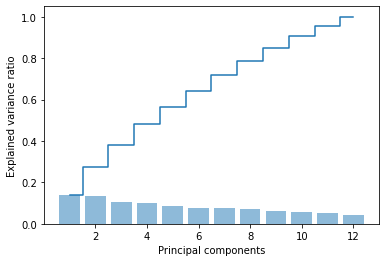

In [36]:
plt.bar(range(1, 13), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 13), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

Shows difference between score and accuracy for logistic regression [here](https://stats.stackexchange.com/a/354710).

In [37]:
#note that scores function is the accuracy of training data while accuracy function is for testing data

from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")
scores_regular =[]
accuracy_regular =[]
pca_scores = []
pca_accuracy = []

#get the accuracy without PCA for training and test data
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train, y_train)
scores_regular.append(lr.score(X_train, y_train))
accuracy_regular.append(accuracy_score(y_test, lr.predict(X_test)))

#get the accuracy with PCA for training and test data
for i in range(6,10):
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train_std)
  X_test_pca = pca.transform(X_test_std)

  lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
  lr = lr.fit(X_train_pca, y_train)
  pca_scores.append(lr.score(X_train_pca, y_train))
  pca_accuracy.append(accuracy_score(y_test, lr.predict(X_test_pca)))

In [38]:
#print scores
import seaborn as sns

#average scores
print("mean scores_regular: {}\nmean accuracy_regular: {}".format(np.mean(scores_regular), np.mean(accuracy_regular)))
print("mean pca_scores: {}\nmean pca_accuracy: {}".format(np.mean(pca_scores), np.mean(pca_accuracy)))

print("\nAccuracy without PCA", accuracy_regular)
print("\nAccuracy with PCA", pca_accuracy)

# fig, subplots = plt.subplots(1,4, figsize=(12, 4))
# sns.distplot(scores_regular, kde=False, ax=subplots[0]) 
# subplots[0].set_title("Scores Regular for Training")
# sns.distplot(accuracy_regular, kde=False, ax=subplots[1]) 
# subplots[1].set_title("Accuracies for Regular Testing")
# sns.distplot(pca_scores, kde=False, ax=subplots[2]) 
# subplots[2].set_title("PCA Scores for Training")
# sns.distplot(pca_accuracy, kde=False, ax=subplots[3]) 
# subplots[3].set_title("PCA Scores for Testing")
# plt.show()
# fig.show()

mean scores_regular: 0.8277511961722488
mean accuracy_regular: 0.8333333333333334
mean pca_scores: 0.832535885167464
mean pca_accuracy: 0.8333333333333334

Accuracy without PCA [0.8333333333333334]

Accuracy with PCA [0.8444444444444444, 0.8333333333333334, 0.8222222222222222, 0.8333333333333334]
